# 0_read_data

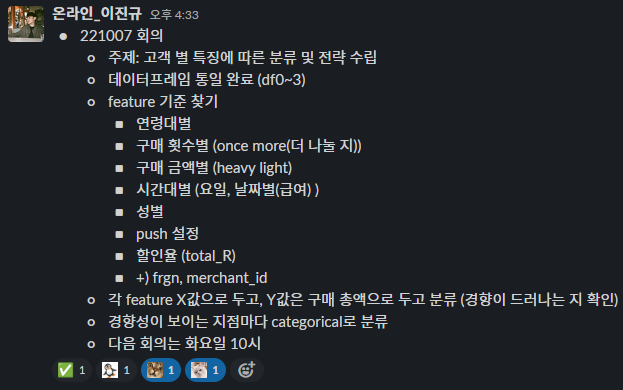

In [1]:
from IPython.display import Image
Image( r'image\청사진.png' )

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
from my_func import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="Malgun Gothic")  ## 폰트       한글 깨짐
plt.rc("axes",unicode_minus=False)     ## 폰트 minus 부호 깨짐
plt.style.use("ggplot")

df1 = pd.read_parquet( "data\df1.parquet" )
df3 = pd.read_parquet( "data\df3.parquet" )

def sp():
    print(f"     {df1.shape[0]:,} x {df1.shape[1]}          {df3.shape[0]:,} x {df3.shape[1]}")
    display(df1.head(1))
    display(df3.head(1))
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


# 1_연령대별 분할

# 2_구매 횟수별 분할 (x)
- - 1회, 나머지?

In [2]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [3]:
### 구매횟수를 기준으로 groupby
data = df3[['cnt_b','cnt_p','pre','total']].groupby("cnt_b").sum()
data = data.reset_index()
view(data,2)
### 구매횟수 / 해당인원수 / 총액 / 할인총액

(372, 4)


,cnt_b,cnt_p,pre,total
0,1,163227,5823506623,504902226
1,2,73138,4495118186,355550615


,cnt_b,cnt_p,pre,total
370,2630,1,35043786,812772
371,2705,1,27186523,653532


In [4]:
### 할인율 평균
data["total_R"] = round(  100 * data.total / data.pre, 1  )
data = data.drop("total",axis=1)
view(data,3)

(372, 4)


,cnt_b,cnt_p,pre,total_R
0,1,163227,5823506623,8.7
1,2,73138,4495118186,7.9
2,3,46042,3948757419,7.7


,cnt_b,cnt_p,pre,total_R
369,1684,1,27831148,2.7
370,2630,1,35043786,2.3
371,2705,1,27186523,2.4


In [5]:
### 1일당 평균 매출. 1건당 평균 매출
data["pre_per_p"] = data.pre // data.cnt_p
data["pre_per_b"] = data.pre // (data.cnt_p * data.cnt_b)
view(data,3)

(372, 6)


,cnt_b,cnt_p,pre,total_R,pre_per_p,pre_per_b
0,1,163227,5823506623,8.7,35677,35677
1,2,73138,4495118186,7.9,61460,30730
2,3,46042,3948757419,7.7,85764,28588


,cnt_b,cnt_p,pre,total_R,pre_per_p,pre_per_b
369,1684,1,27831148,2.7,27831148,16526
370,2630,1,35043786,2.3,35043786,13324
371,2705,1,27186523,2.4,27186523,10050


In [6]:
infox(data)

◆◆◆ (372, 6): Total shape ◆◆◆
---(372, 6): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO     Column  null  null(%)    dtype  n_uniq  |         Mean          Std      |max-min|  │        min          Q1      median           Q3            max  
 0      cnt_b     0      0.0    int64     372  |        219.8        253.7          2,704  │          1       93.75       186.5        280.5          2,705  
 1      cnt_p     0      0.0    int64     164  |        1,464        9,914        163,226  │          1           2          13        162.5        163,227  
 2        pre     0      0.0    int64     372  |  309,238,954  670,372,644  5,820,958,328  │  2,548,295  12,090,359  39,328,140  252,865,258  5,823,506,623  
 3    total_R     0      0.0  float64      67  |        7.501        1.292           12.7  │        1.4         7.2         7.5            8           14.1  
 4  pre_per_p     0      0.0    int64     372  |    3,486,077    3,740,843     35,008,109  │     35,677 

In [7]:
x, x_tag = range(372), data.cnt_b
cols = [data.iloc[:,i] for i in range(1,6)]
cols_tag = ["해당인원수", "발생 매출", "종합 할인률", "1인당 매출 평균", "1건당 매출 평균"]
x_tag2 = [x if x in {1,5,10,20,50,100,200,556,2705} else "" for x in x_tag]

A = [] # 가중치 집합
for i in range(5):
    print(cols_tag[i], max(cols[i]), (a := 5823506623//max(cols[i])) )
    A.append(a)

해당인원수 163227 35677
발생 매출 5823506623 1
종합 할인률 14.1 413014654.0
1인당 매출 평균 35043786 166
1건당 매출 평균 50123 116184


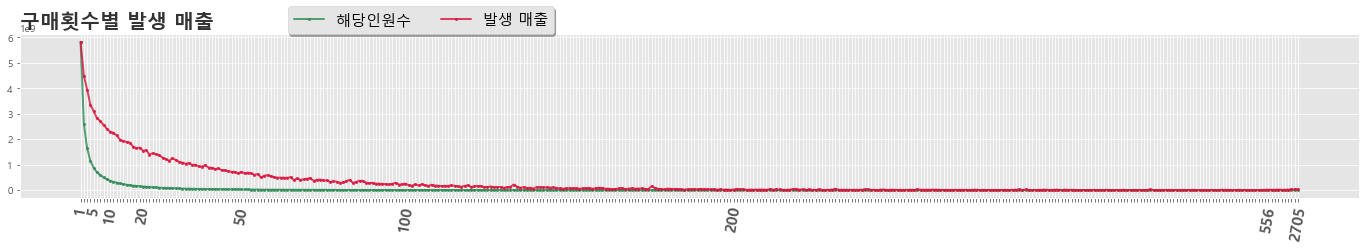

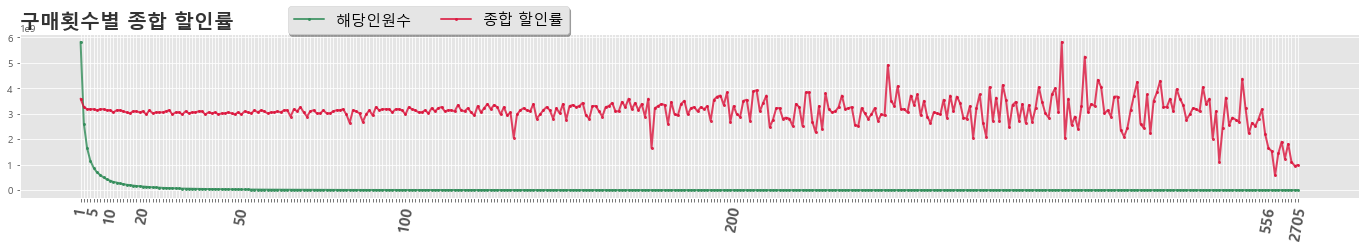

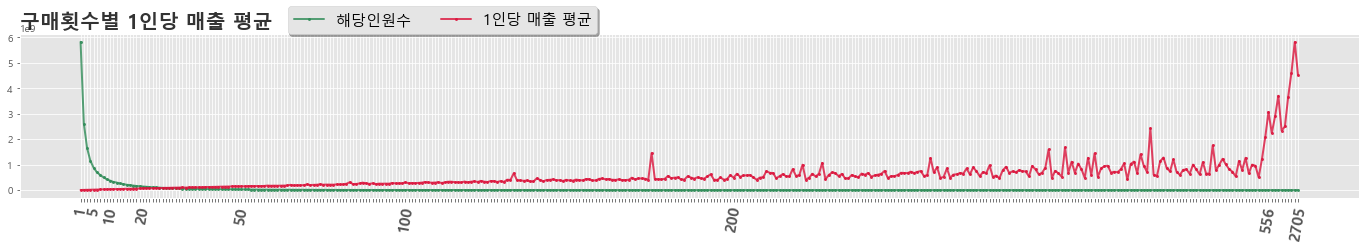

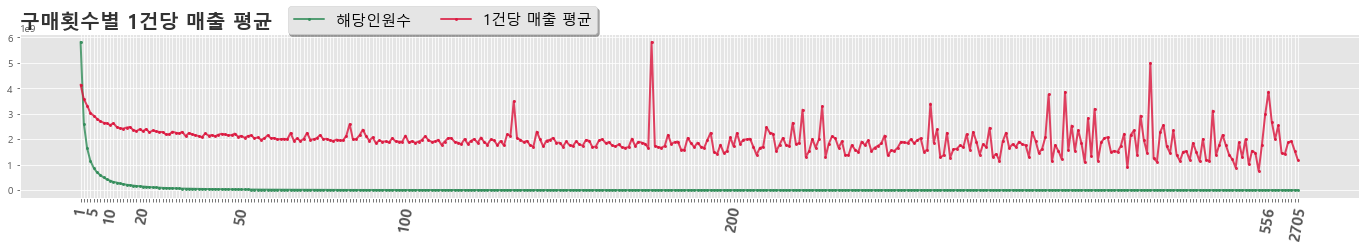

In [8]:
for i in range(1,5):
    plt.figure(figsize=((24,3)))
    plt.plot( x, cols[0]*A[0], label=cols_tag[0], alpha=0.8, lw=2, ls="-", color ="seagreen", marker='o', ms=2, mfc="seagreen", solid_capstyle='round' )
    plt.plot( x, cols[i]*A[i], label=cols_tag[i], alpha=0.8, lw=2, ls="-", color ="crimson", marker='o', ms=2, mfc="crimson", solid_capstyle='round' )
    plt.xticks(x, x_tag2, size=15, weight=1000, rotation=80 )
    plt.title("구매횟수별 "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.2,1), ncol=2, fontsize=15, frameon=True, shadow=True)
    plt.show()

In [ ]:
""" 구매횟수:

    매출에 영향을 끼치는 고객 특유의 속성(독립변수)이라기보다, 행동양식 결과물(종속변수)에 가깝다.
    
    신규유저를 받았을때, 그 유저가 구매기록을 축적하기 전에는 요소로써 활용 불가능한 지표 """

### 1번 구매한 사람이 많은 매출을 기록한다고 해서 ---> 1회 구매를 장려 할 수도 없는 노릇.

### 게다가 1번 구매한 사람도 실제 특성은 극명하게 갈린다. ---> 일부 실제 93만원 구매자 매출 하드캐리
    
""" 결론: 구매횟수는 고객군을 나누는 기준으로 적절치 않다 """

# 3_구매 금액별 분할 (x)
- 보따리상, 일반?

### ---- 금액별 분할

In [9]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [10]:
data = df3.sort_values("pre")  ## 매출 순서대로 정렬
view(data)

(544921, 31)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
359920,359921,22,0,0,0,1999-01-30,2019-07-24 23:48:41.532,2019-07-24,2019,7,24,500,500,0,0,0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
377380,377381,48,1,1,0,1973-08-22,2019-08-02 20:41:51.412,2019-08-02,2019,8,2,115005350,112273800,0,2731550,2731550,0.0,2.4,2.4,1,175,9,15,22,19,28,22,20,14,17,9


In [11]:
### 결제금액별 (정확히 일치) 압축
cols = ['age', 'man', 'push', 'frgn', 'pre', 'total', 'cnt_p', 'cnt_b', 'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']
data2 = data[cols].groupby("pre").sum()
view(data2,2)

(168111, 17)


,age,man,push,frgn,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
pre,,,,,,,,,,,,,,,,,
500,442,8,6,0,25,13,13,1,1,1,2,1,1,3,2,0,1
520,121,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0


,age,man,push,frgn,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
pre,,,,,,,,,,,,,,,,,
110444100,37,1,1,0,2198593,1,133,8,25,11,18,14,18,11,11,11,6
115005350,48,1,1,0,2731550,1,175,9,15,22,19,28,22,20,14,17,9


In [12]:
for i in [f"m_{i}" for i in range(1,11)]:
    data2[i] = round(  100*data2[i] / data2["cnt_b"], 1 )  # 상업코드별 차지 비중(%)

for i in ["age","cnt_b"]:
    data2[i] = round(  data2[i] / data2["cnt_p"]  )  # 평균 나이, 평균 구매건수

for i in ["man","push","frgn"]:
    data2[i] = round(  100*data2[i] / data2["cnt_p"], 1 )  # 남성비중(%), 알람비중(%), 외국인비중(%)

data2["total_R"] = round(  100*data2["total"] / data2.index, 1 )  # 평균 종합할인율(%)
data2 = data2.drop(["total"],axis=1)

data2["pre_sum"] = data2.index * data2["cnt_p"]  # 해당 그룹의 총매출
pre_sum = sum(df3.pre)
data2["pre_sum_R"] = round( 100*data2["pre_sum"] / pre_sum, 4 )  # 해당 그룹의 총매출 비중(%)

view(data2,2)

(168111, 19)


,age,man,push,frgn,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,total_R,pre_sum,pre_sum_R
pre,,,,,,,,,,,,,,,,,,,
500,34.0,61.5,46.2,0.0,13,1.0,7.7,7.7,7.7,15.4,7.7,7.7,23.1,15.4,0.0,7.7,5.0,6500,0.0
520,121.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,520,0.0


,age,man,push,frgn,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,total_R,pre_sum,pre_sum_R
pre,,,,,,,,,,,,,,,,,,,
110444100,37.0,100.0,100.0,0.0,1,133.0,6.0,18.8,8.3,13.5,10.5,13.5,8.3,8.3,8.3,4.5,2.0,110444100,0.096
115005350,48.0,100.0,100.0,0.0,1,175.0,5.1,8.6,12.6,10.9,16.0,12.6,11.4,8.0,9.7,5.1,2.4,115005350,0.100


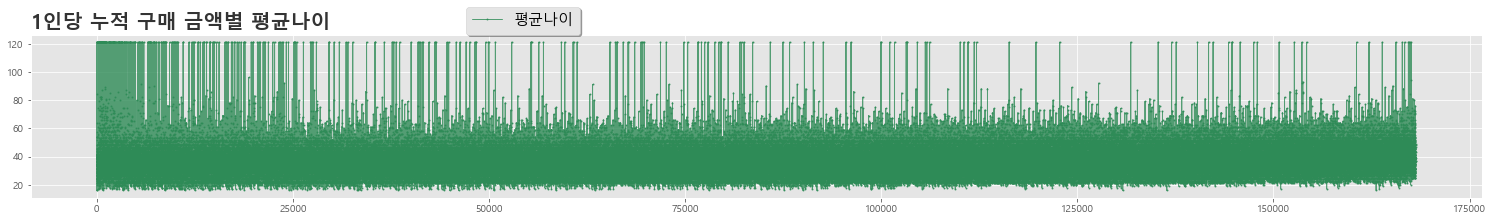

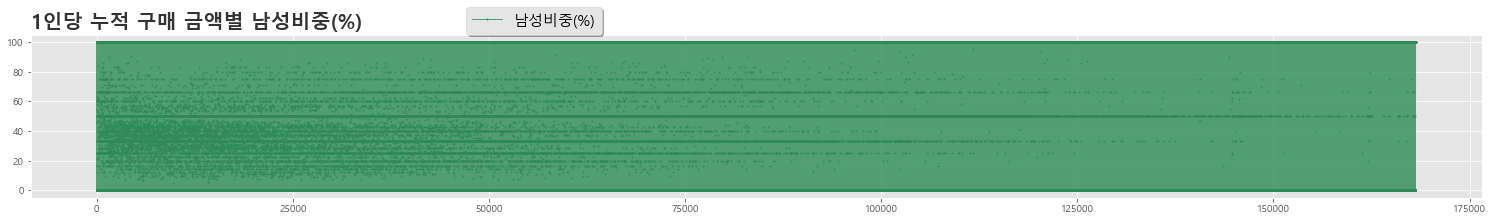

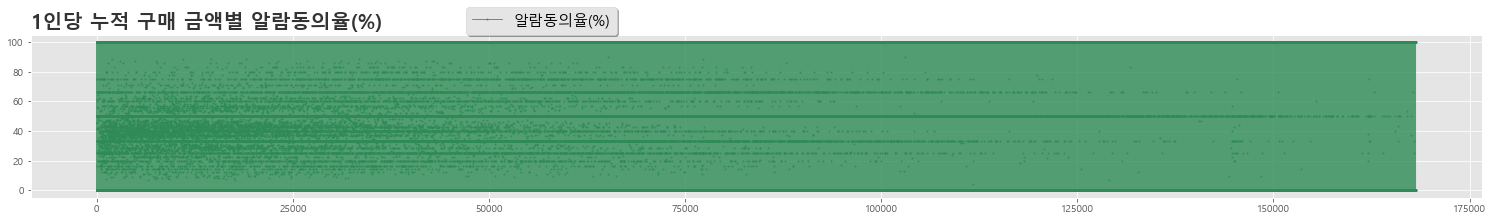

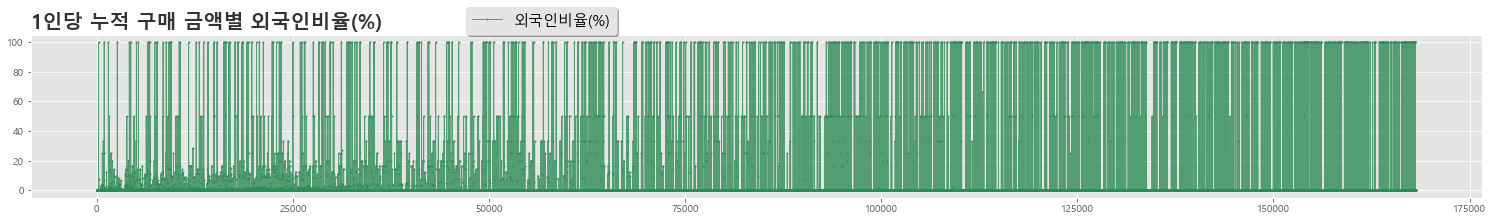

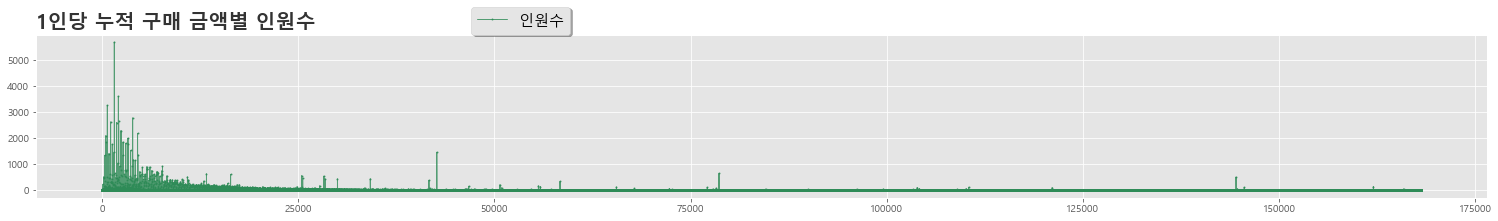

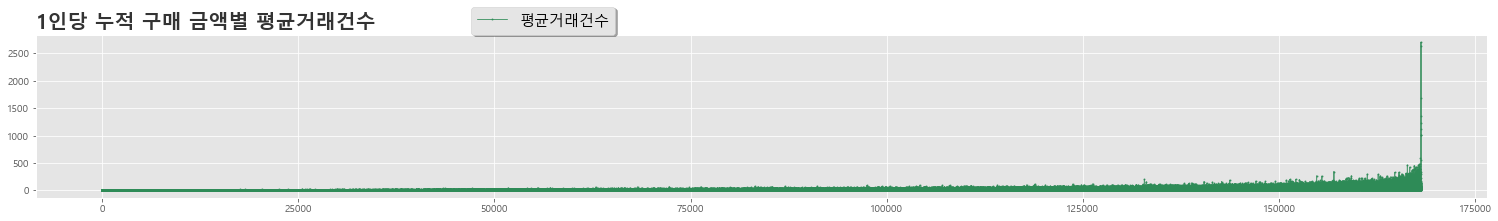

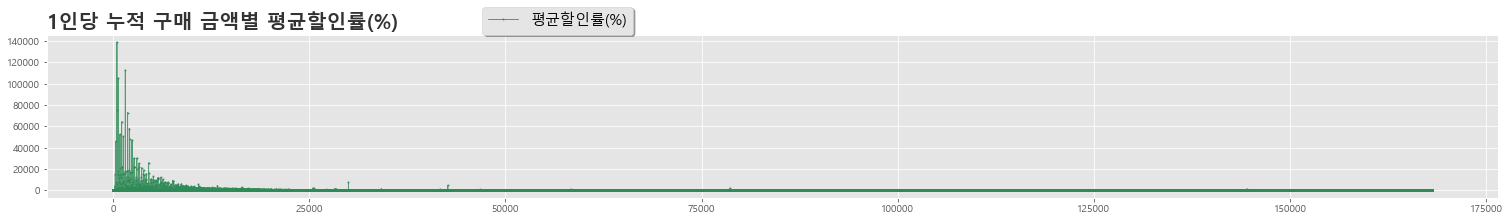

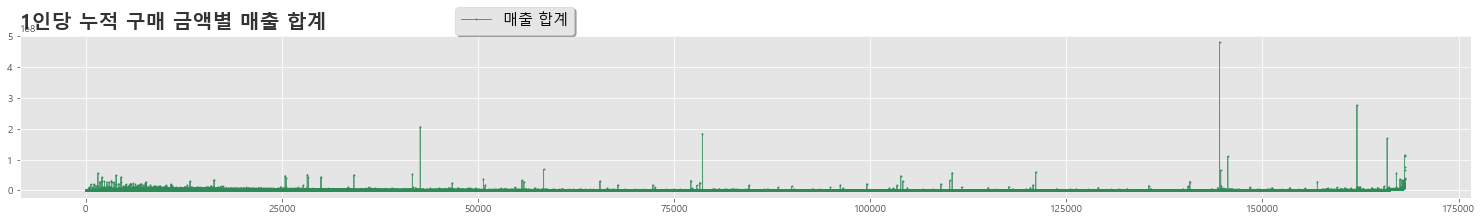

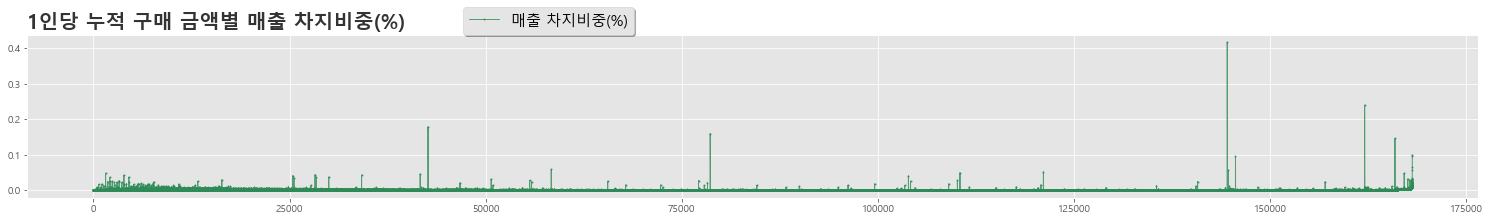

In [13]:
x, x_tag = range(168111), data2.index
cols = [data2.iloc[:,i] for i in [0,1,2,3,4,5,16,17,18]]
cols_tag = ["평균나이","남성비중(%)","알람동의율(%)","외국인비율(%)","인원수","평균거래건수","평균할인률(%)","매출 합계","매출 차지비중(%)"]

for i in range(9):
    plt.figure(figsize=((26,3)))
    plt.plot( x, cols[i], label=cols_tag[i], alpha=0.8, lw=1, ls="-", color ="seagreen", marker='o', ms=1, mfc="seagreen", solid_capstyle='round' )
    # plt.xticks(x, x_tag2, size=15, weight=1000, rotation=80 )
    plt.title("1인당 누적 구매 금액별 "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.3,1), ncol=2, fontsize=15, frameon=True, shadow=True)
    plt.show()

In [14]:
data2.loc[data2.pre_sum_R>=0.1,"cnt_p"]

pre
141000       1462
282000        653
935000        514
1870000       148
2805000        60
115005350       1
Name: cnt_p, dtype: int64

In [15]:
d1 = df3.loc[ df3.pre==2805000, ["pre","cnt_p","cnt_b"] ]
view(d1,3)

(60, 3)


,pre,cnt_p,cnt_b
36364,2805000,1,7
47993,2805000,1,3
74569,2805000,1,3


,pre,cnt_p,cnt_b
507353,2805000,1,4
514593,2805000,1,3
533062,2805000,1,4


In [16]:
d2 = d1.groupby("cnt_b").sum()
d2

,pre,cnt_p
cnt_b,,
3,123420000,44
4,14025000,5
5,8415000,3
6,8415000,3
7,5610000,2
12,2805000,1
16,2805000,1
21,2805000,1


In [17]:
member = list(df3.loc[ (df3.cnt_b==3) & (df3.pre==2805000), "id"])

df1.loc[ df1.id.apply(lambda x:True if x in member else False) ].groupby("pre").sum()

,id,age,man,push,frgn,m_id,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_y,buy_m,buy_d,buy_7,cnt_b
pre,,,,,,,,,,,,,,,,,,
935000,41274204,5604,66,66,0,740,120200000,0,3220000,3220000,0.0,341.0,341.0,266508,1468,3026,106,132


### ---- 인원수 균등분할

In [18]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [26]:
data = df3.sort_values("pre").iloc[:,:-10]  ## 상업코드 버리고 구매금액별 오름차순
data = data.reset_index(drop=True)
view(data,2)

(544921, 21)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
0,359921,22,0,0,0,1999-01-30,2019-07-24 23:48:41.532,2019-07-24,2019,7,24,500,500,0,0,0,0.0,0.0,0.0,1,1
1,94029,33,1,1,0,1988-01-27,2019-06-20 13:50:31.260,2019-06-20,2019,6,20,500,500,0,0,0,0.0,0.0,0.0,1,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
544919,94844,37,1,1,0,1984-03-10,2020-01-06 00:29:47.110,2020-01-06,2020,1,6,110444100,108395600,150093,2048500,2198593,0.1,1.9,2.0,1,133
544920,377381,48,1,1,0,1973-08-22,2019-08-02 20:41:51.412,2019-08-02,2019,8,2,115005350,112273800,0,2731550,2731550,0.0,2.4,2.4,1,175


In [27]:
print( N := len(df3) ) ## 전체 유저 인원수
print( n := N//20 )    ## 20 그룹으로 나눌 때 인원수

data["case"] = data.index // n
view(data,2)

544921
27246
(544921, 22)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,case
0,359921,22,0,0,0,1999-01-30,2019-07-24 23:48:41.532,2019-07-24,2019,7,24,500,500,0,0,0,0.0,0.0,0.0,1,1,0
1,94029,33,1,1,0,1988-01-27,2019-06-20 13:50:31.260,2019-06-20,2019,6,20,500,500,0,0,0,0.0,0.0,0.0,1,1,0


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,case
544919,94844,37,1,1,0,1984-03-10,2020-01-06 00:29:47.110,2020-01-06,2020,1,6,110444100,108395600,150093,2048500,2198593,0.1,1.9,2.0,1,133,19
544920,377381,48,1,1,0,1973-08-22,2019-08-02 20:41:51.412,2019-08-02,2019,8,2,115005350,112273800,0,2731550,2731550,0.0,2.4,2.4,1,175,20


In [28]:
data.iloc[-1,-1] = 19  ### (마지막 유저 수정)
data.tail(2)

,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,case
544919,94844,37,1,1,0,1984-03-10,2020-01-06 00:29:47.110,2020-01-06,2020,1,6,110444100,108395600,150093,2048500,2198593,0.1,1.9,2.0,1,133,19
544920,377381,48,1,1,0,1973-08-22,2019-08-02 20:41:51.412,2019-08-02,2019,8,2,115005350,112273800,0,2731550,2731550,0.0,2.4,2.4,1,175,19


In [29]:
cols = ['age', 'man', 'push', 'frgn', 'pre', 'total', 'cnt_p', 'cnt_b', 'case']  ### 구매금액별 20가지 case로 합산
data2 = data[cols].groupby("case").sum()
data2

,age,man,push,frgn,pre,total,cnt_p,cnt_b
case,,,,,,,,
0,1036425,12407,9473,93,164004039,58082604,27246,28465
1,1016597,10791,10023,96,282931056,64617276,27246,29337
2,1020079,10379,10281,110,364994730,75474444,27246,32196
3,1006987,10573,10584,107,466445198,75193213,27246,35604
4,996883,10004,10541,133,582157054,93897219,27246,43715
5,995990,9982,10593,122,725551649,103050859,27246,49515
6,994212,9808,10821,135,887581949,117880879,27246,58746
7,995386,9770,11068,133,1095800439,135077390,27246,71739
8,987645,9974,10898,122,1347770830,151691886,27246,82327


In [30]:
data2["total_R"] = round( 100*data2["total"]/data2["pre"], 1)  ### 평균 할인률(%)

PRE, CNT_B = sum(df3.pre), sum(df3.cnt_b)
data2["pre_R"] = round( 100*data2["pre"]/PRE, 1)      ### 전체대비 매출     차지 비율(%)
data2["cnt_R"] = round( 100*data2["cnt_b"]/CNT_B, 1)  ### 전체대비 구매횟수 차지 비율(%)

data2["age"] = round( data2.age/data2.cnt_p, 1)         ### 평균 나이
data2["man"] = round( 100*data2.man/data2.cnt_p, 1)         ### 남성 비율(%)
data2["push"] = round( 100*data2.push/data2.cnt_p, 1)       ### 알람설정 비율(%)
data2["frgn"] = round( 100*data2.frgn/data2.cnt_p, 1)       ### 외국인 비율(%)
data2["pre_1"] = data2.pre//data2.cnt_p                 ### 1인당 평균 결제 금액
data2["cnt_b_1"] = round( data2.cnt_b//data2.cnt_p, 1)  ### 1인당 평균 구매 횟수

data2 = data2.drop(["total","cnt_p"], axis=1)
data2 = data2[['age','man','push','frgn','pre','pre_R','pre_1','total_R','cnt_b','cnt_R','cnt_b_1']]
data2

,age,man,push,frgn,pre,pre_R,pre_1,total_R,cnt_b,cnt_R,cnt_b_1
case,,,,,,,,,,,
0,38.0,45.5,34.8,0.3,164004039,0.1,6019,35.4,28465,0.5,1
1,37.3,39.6,36.8,0.4,282931056,0.2,10384,22.8,29337,0.5,1
2,37.4,38.1,37.7,0.4,364994730,0.3,13396,20.7,32196,0.6,1
3,37.0,38.8,38.8,0.4,466445198,0.4,17119,16.1,35604,0.6,1
4,36.6,36.7,38.7,0.5,582157054,0.5,21366,16.1,43715,0.8,1
5,36.6,36.6,38.9,0.4,725551649,0.6,26629,14.2,49515,0.9,1
6,36.5,36.0,39.7,0.5,887581949,0.8,32576,13.3,58746,1.0,2
7,36.5,35.9,40.6,0.5,1095800439,1.0,40218,12.3,71739,1.3,2
8,36.2,36.6,40.0,0.4,1347770830,1.2,49466,11.3,82327,1.5,3


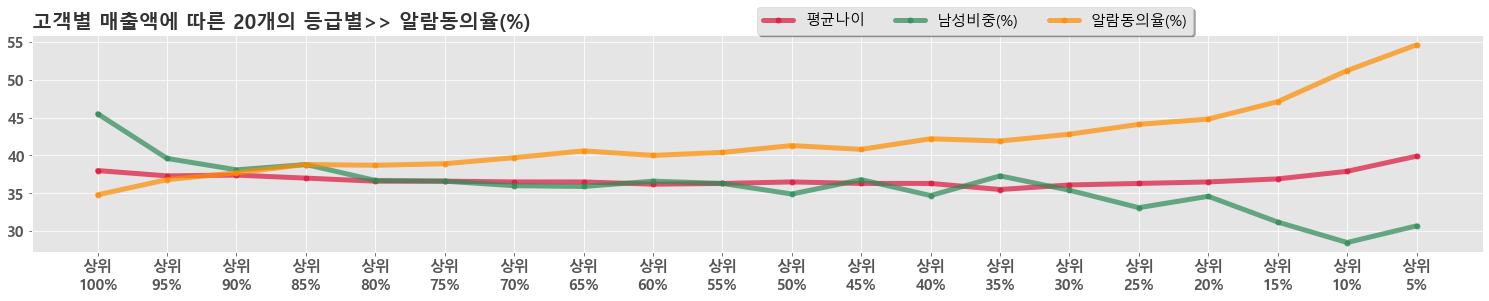

In [31]:
x, x_tag = range(20), [f"상위\n{5*i}%" for i in range(20,0,-1)]
idx = [0,1,2,3,5,6,7,9,10]
cols_tag = ["평균나이","남성비중(%)","알람동의율(%)","외국인비율(%)","매출 차지 비중(%)","1인당 평균 구매금액(백만)","평균할인률(%)","구매횟수 차지 비중(%)","1인당 평균 구매횟수"]
c = ["crimson", "seagreen", "DarkOrange", "DimGrey", "crimson", "seagreen", "steelblue", "DarkOrange", "RoyalBlue"]

plt.figure(figsize=((26,4)))
for i in range(3):
    plt.plot( x, data2.iloc[:,idx[i]], label=cols_tag[i], alpha=0.7, lw=5, ls="-", color =c[i], marker='o', ms=5, mfc=c[i], solid_capstyle='round' )
    plt.xticks(x, x_tag, size=15, weight=1000, )
    plt.yticks( size=15, weight=1000, )
    plt.title("고객별 매출액에 따른 20개의 등급별>> "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.5,1), ncol=4, fontsize=15, frameon=True, shadow=True)
plt.show()

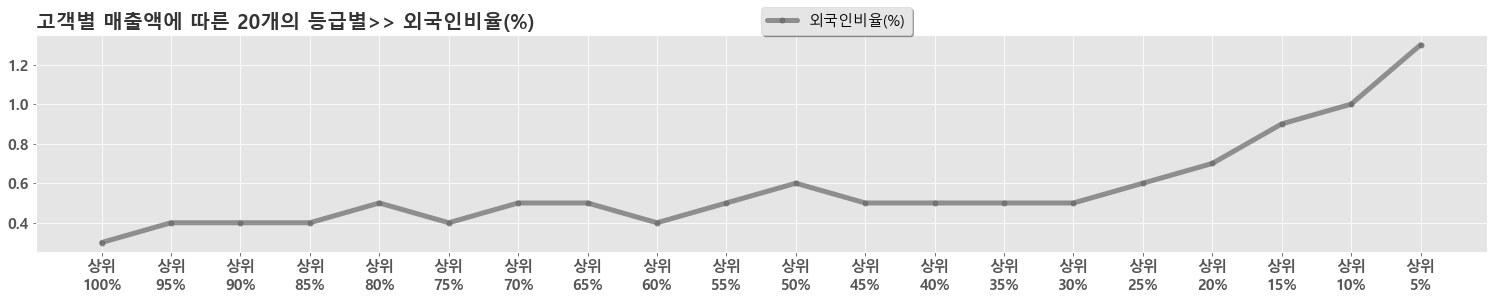

In [32]:
for i in [3]:
    plt.figure(figsize=((26,4)))
    plt.plot( x, data2.iloc[:,idx[i]], label=cols_tag[i], alpha=0.7, lw=5, ls="-", color ="DimGrey", marker='o', ms=5, mfc="DimGrey", solid_capstyle='round' )
    plt.xticks( x, x_tag, size=15, weight=1000, )
    plt.yticks( size=15, weight=1000, )
    plt.title("고객별 매출액에 따른 20개의 등급별>> "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.5,1), ncol=4, fontsize=15, frameon=True, shadow=True)
    plt.show()

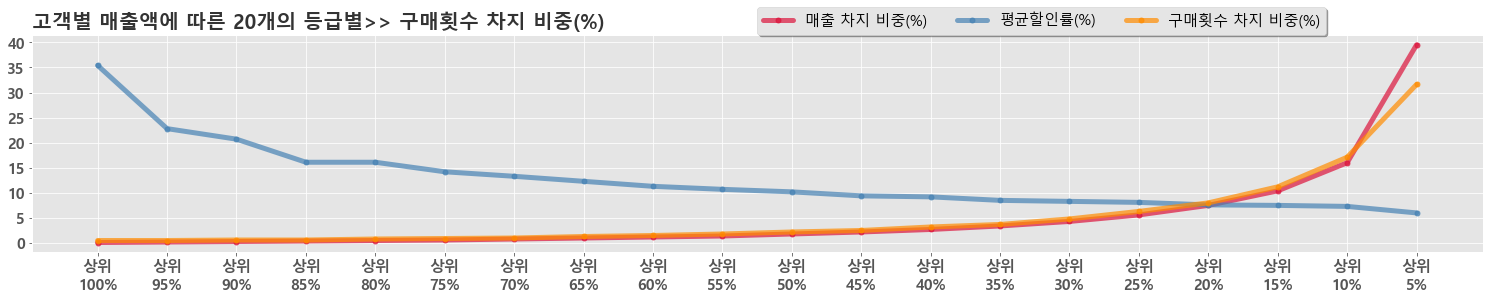

In [33]:
plt.figure(figsize=((26,4)))
for i in [4,6,7]:  ## 5,8
    plt.plot( x, data2.iloc[:,idx[i]], label=cols_tag[i], alpha=0.7, lw=5, ls="-", color =c[i], marker='o', ms=5, mfc=c[i], solid_capstyle='round' )
    plt.xticks(x, x_tag, size=15, weight=1000, )
    plt.yticks( size=15, weight=1000, )
    plt.title("고객별 매출액에 따른 20개의 등급별>> "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.50,1), ncol=3, fontsize=15, frameon=True, shadow=True)
plt.show()

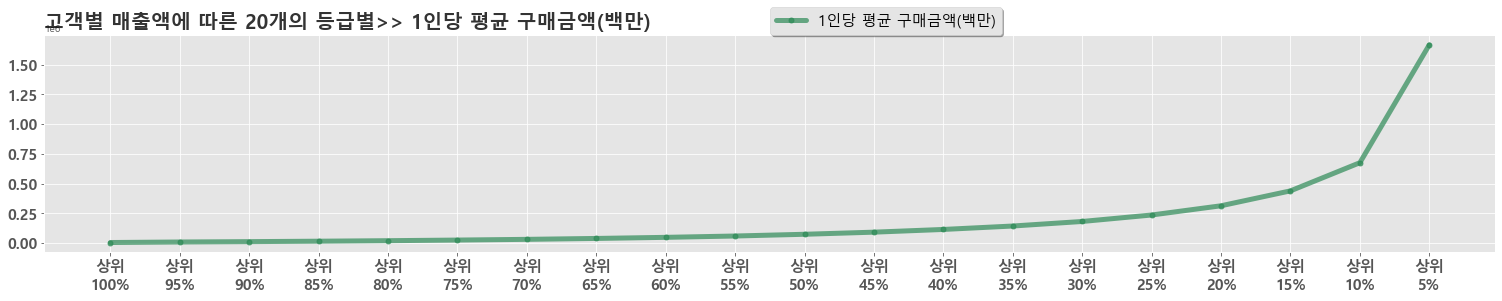

In [34]:
plt.figure(figsize=((26,4)))
for i in [5]:  ## 5,8
    plt.plot( x, data2.iloc[:,idx[i]], label=cols_tag[i], alpha=0.7, lw=5, ls="-", color =c[i], marker='o', ms=5, mfc=c[i], solid_capstyle='round' )
    plt.xticks(x, x_tag, size=15, weight=1000, )
    plt.yticks( size=15, weight=1000, )
    plt.title("고객별 매출액에 따른 20개의 등급별>> "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.50,1), ncol=3, fontsize=15, frameon=True, shadow=True)
plt.show()

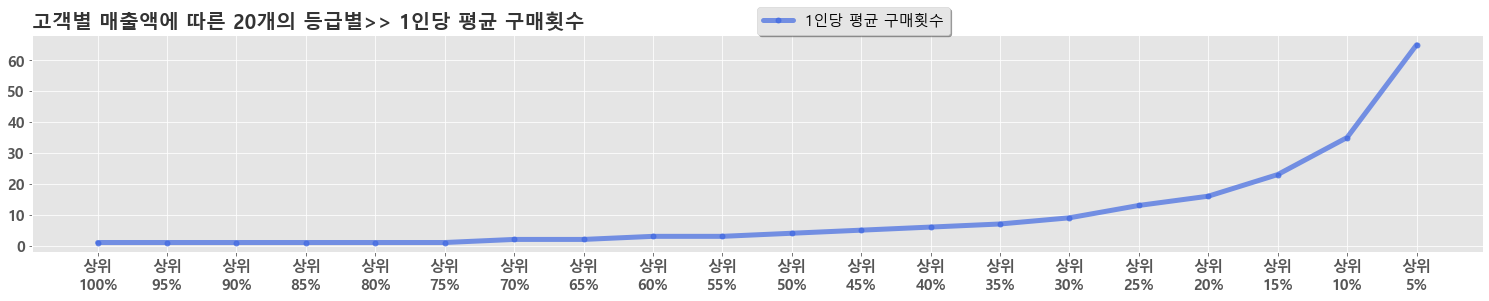

In [35]:
plt.figure(figsize=((26,4)))
for i in [8]:
    plt.plot( x, data2.iloc[:,idx[i]], label=cols_tag[i], alpha=0.7, lw=5, ls="-", color =c[i], marker='o', ms=5, mfc=c[i], solid_capstyle='round' )
    plt.xticks(x, x_tag, size=15, weight=1000, )
    plt.yticks( size=15, weight=1000, )
    plt.title("고객별 매출액에 따른 20개의 등급별>> "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
    plt.legend(loc=(0.50,1), ncol=3, fontsize=15, frameon=True, shadow=True)
plt.show()

In [36]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [37]:
N,n = len(df3), len(df3)//100  ## 전체 인원수, 1% 인원수
print(N,n)
chai = sum(df3.pre)  ## 전체 매출
print(f"{chai:,}")

data = df3[["pre","cnt_p"]].sort_values(by="pre",ascending=False)
data = data.reset_index(drop=True)
data

544921 5449
115,036,891,079


,pre,cnt_p
0,115005350,1
1,110444100,1
2,76952000,1
3,66233030,1
4,39306136,1
...,...,...
544916,500,1
544917,500,1
544918,500,1
544919,500,1


In [40]:
### 개인별 매출액 내림차순 한줄세우기 (1% 씩)
dic1 = [[i,round(100*sum(data.iloc[n*(i-1):n*i,0])/chai,2),round(100*sum(data.iloc[:n*i,0])/chai,2)] for i in range(1,101)]

In [41]:
df_rate = pd.DataFrame( dic1, columns=["상위","구간","누적"] )
view(df_rate,20)

(100, 3)


,상위,구간,누적
0,1,15.87,15.87
1,2,7.95,23.82
2,3,6.11,29.93
3,4,5.06,35.00
4,5,4.45,39.45
5,6,3.93,43.38
6,7,3.48,46.87
7,8,3.14,50.00
8,9,2.85,52.85
9,10,2.61,55.46


,상위,구간,누적
80,81,0.09,98.98
81,82,0.08,99.06
82,83,0.08,99.14
83,84,0.08,99.22
84,85,0.07,99.29
85,86,0.07,99.36
86,87,0.07,99.43
87,88,0.06,99.49
88,89,0.06,99.55
89,90,0.06,99.61


In [43]:
df_rate = df_rate.set_index("상위")
dp(df_rate.T,4,20)

상위,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
구간,15.87,7.95,6.11,5.06,4.45,3.93,3.48,3.14,2.85,2.61,2.40,2.22,2.07,1.93,1.80,1.68,1.57,1.48,1.39,1.32
누적,15.87,23.82,29.93,35.00,39.45,43.38,46.87,50.00,52.85,55.46,57.87,60.09,62.15,64.08,65.88,67.56,69.13,70.61,72.01,73.33


상위,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
구간,1.25,1.18,1.12,1.06,1.00,0.95,0.91,0.86,0.82,0.78,0.75,0.71,0.68,0.66,0.63,0.60,0.57,0.55,0.52,0.50
누적,74.58,75.76,76.88,77.94,78.94,79.90,80.80,81.67,82.49,83.27,84.02,84.73,85.41,86.07,86.69,87.29,87.87,88.41,88.94,89.44


상위,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
구간,0.48,0.46,0.44,0.42,0.40,0.39,0.37,0.36,0.34,0.33,0.31,0.30,0.29,0.27,0.26,0.25,0.24,0.23,0.22,0.22
누적,89.91,90.37,90.81,91.23,91.64,92.03,92.40,92.75,93.09,93.42,93.73,94.03,94.32,94.59,94.86,95.11,95.35,95.59,95.81,96.03


상위,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
구간,0.21,0.20,0.19,0.18,0.18,0.17,0.16,0.15,0.15,0.14,0.14,0.13,0.13,0.12,0.12,0.11,0.11,0.1,0.1,0.09
누적,96.23,96.43,96.62,96.80,96.98,97.15,97.31,97.46,97.61,97.75,97.89,98.02,98.15,98.27,98.38,98.49,98.60,98.7,98.8,98.89


상위,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
구간,0.09,0.08,0.08,0.08,0.07,0.07,0.07,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.02,0.02
누적,98.98,99.06,99.14,99.22,99.29,99.36,99.43,99.49,99.55,99.61,99.67,99.72,99.77,99.81,99.86,99.90,99.93,99.96,99.98,100.00


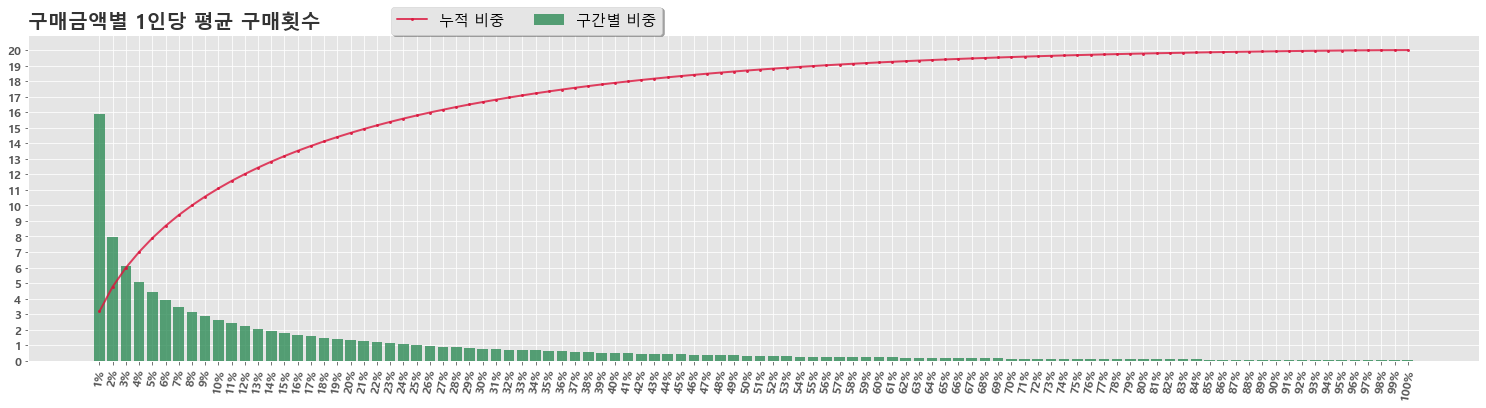

In [94]:
x,y1,y2 = range(1,101), df_rate.구간, df_rate.누적
plt.figure(figsize=((26,6)))
plt.bar(  x, y1,   label="구간별 비중", alpha=0.8, color ="seagreen", )
plt.plot( x, y2/5, label="누적 비중",   alpha=0.8, lw=2, ls="-", color ="crimson", marker='o', ms=2, mfc="crimson", solid_capstyle='round' )
plt.xticks(x, [f"{i}%" for i in df_rate.index], size=12, weight=1000, rotation=80 )
plt.yticks(range(21), size=12, weight=1000, )
plt.title("구매금액별 "+cols_tag[i], weight=1000, color="k", size=20, alpha=0.8, loc="left", )
plt.legend(loc=(0.25,1), ncol=2, fontsize=15, frameon=True, shadow=True)
plt.show()

In [98]:
infox(df1)

◆◆◆ (5623810, 23): Total shape ◆◆◆
---(5623810, 19): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO    Column  null  null(%)    dtype   n_uniq  |     Mean      Std  |max-min|  │    min       Q1   median       Q3        max  
 0        id     0      0.0    int64  544,921  |  272,331  157,247    544,920  │      1  136,186  272,568  408,236    544,921  
 1       age     0      0.0    int64       83  |    38.35    10.01        106  │     15       31       38       44        121  
 2       man     0      0.0    int64        2  |   0.2763   0.4472          1  │      0        0        0        1          1  
 3      push     0      0.0    int64        2  |    0.517   0.4997          1  │      0        0        1        1          1  
 4      frgn     0      0.0    int64        2  |    0.011   0.1044          1  │      0        0        0        0          1  
 5      m_id     0      0.0    int64       10  |      5.5     2.63          9  │      1        3        6        8  

# 4_시간대별 분할
- 요일, 날짜별(급여관련?)

In [11]:
5e+05

500000.0

# 5_성별 분할

In [81]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


# 6_알람설정별 분할

# 7_할인률별 분할
- total_R

# 8_기타: 외국인, 상업코드

In [58]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [59]:
data = df3[['id', 'age', 'man', 'push', 'frgn', 'birth', 'sign_cut', 'pre', 'post', 'c_back', 'dscnt', 'total',
            'cnt_p', 'cnt_b', 'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10']]

data1 = data.loc[ data.frgn==1 ].sort_values("pre").reset_index(drop=True)
data0 = data.loc[ data.frgn==0 ].sort_values("pre").reset_index(drop=True)
data2 = data.sort_values("pre")

view(data1)
view(data0)
view(data2)

(3141, 24)


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,374892,36,0,1,1,1985-12-08,2020-01-04,1900,1900,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
3140,357525,31,0,1,1,1990-09-06,2019-07-25,22328954,21730846,181046,598108,779154,1,1020,72,102,105,93,125,117,108,127,115,56


(541780, 24)


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,280054,36,1,0,0,1985-07-11,2020-01-04,500,500,10,0,10,1,1,0,0,0,0,0,0,0,1,0,0


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
541779,377381,48,1,1,0,1973-08-22,2019-08-02,115005350,112273800,0,2731550,2731550,1,175,9,15,22,19,28,22,20,14,17,9


(544921, 24)


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
359920,359921,22,0,0,0,1999-01-30,2019-07-24,500,500,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


,id,age,man,push,frgn,birth,sign_cut,pre,post,c_back,dscnt,total,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
377380,377381,48,1,1,0,1973-08-22,2019-08-02,115005350,112273800,0,2731550,2731550,1,175,9,15,22,19,28,22,20,14,17,9


In [60]:
100*len(data1)/len(df3)

0.5764138287935315

# A_생일근방 매출 패턴
- 표본 선정 기준1) 생일이 8월부터 3월까지 이내에 포함 될 것

In [61]:
df1.loc[ df1.id==369369 ]

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
1276796,369369,24,0,1,0,1997-01-08,2019-09-30 09:04:44.452,2019-09-30 09:03:44.815,4,22800,21299,0,1501,1501,0.0,6.6,6.6,2019-09-30,2019,9,30,0,1


# B_보따리상품 단타 판매 여부
- "보따리상품의 소량 거래 비중 확인"
- 
- 보따리상인이 대량 pick 했기에 ---> 보따리상품?
- 반대로, 상품자체가 대박이라 -----> 상인들이 사재기?

# C_1,2번째 구매간격별 분할
- 가입일이 2019.08.01 이후여야 공정한 데이터

In [73]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [74]:
infox(df1[["buy"]]) ## 구매기록 범위

◆◆◆ (5623810, 1): Total shape ◆◆◆
---(5623810, 1): DateTime Data ↓↓↓ --------------------------------------------
NO  Column  null  null(%)           dtype     n_uniq  |                      min                      max  
 0     buy     0      0.0  datetime64[ns]  5,622,647  |  2019-08-01 00:32:56.331  2020-03-31 23:59:14.018  
------------------------------------------------------------------------------ 



In [75]:
### 2019-08-01 이후 가입자
data = df3.loc[ df3.sign_cut>="2019-08-01" ].sort_values(by="sign")
view(data)

(392188, 31)


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
193703,193704,41,0,0,0,1980-03-01,2019-08-01 00:11:07.485,2019-08-01,2019,8,1,84200,77200,0,7000,7000,0.0,8.3,8.3,1,2,0,1,0,0,0,0,0,0,0,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
285117,285118,23,0,0,0,1998-09-09,2020-03-31 23:52:26.260,2020-03-31,2020,3,31,137700,137700,4131,0,4131,3.0,0.0,3.0,1,1,0,0,0,0,0,0,0,0,1,0


In [76]:
member = list(data.id)
print(len(member))

392188


In [77]:
### 가입보다 구매가 빠른사람
data = df1.loc[ df1.sign > df1.buy ]
data

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1
16,383717,22,0,1,0,1999-02-26,2019-08-01 00:34:17.921,2019-08-01 00:33:07.205,1,10900,2900,0,8000,8000,0.0,73.4,73.4,2019-08-01,2019,8,1,3,1
35,90046,35,1,1,0,1986-01-16,2019-08-01 00:35:53.542,2019-08-01 00:33:25.038,4,13900,5900,0,8000,8000,0.0,57.6,57.6,2019-08-01,2019,8,1,3,1
49,103513,42,1,0,0,1979-11-03,2019-08-01 00:35:45.492,2019-08-01 00:33:32.039,8,10700,7700,0,3000,3000,0.0,28.0,28.0,2019-08-01,2019,8,1,3,1
53,45130,49,1,0,0,1972-12-13,2019-08-01 00:35:49.588,2019-08-01 00:33:40.741,9,12800,9800,0,3000,3000,0.0,23.4,23.4,2019-08-01,2019,8,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623330,177243,40,1,0,0,1981-04-17,2020-03-31 23:29:42.272,2020-03-31 23:28:20.938,9,46300,46300,0,0,0,0.0,0.0,0.0,2020-03-31,2020,3,31,1,1
5623370,422584,49,0,0,0,1972-09-09,2020-03-31 23:31:34.298,2020-03-31 23:30:36.361,6,5000,5000,0,0,0,0.0,0.0,0.0,2020-03-31,2020,3,31,1,1
5623530,268475,24,1,0,0,1997-09-16,2020-03-31 23:41:37.750,2020-03-31 23:40:02.177,7,45900,45900,1377,0,1377,3.0,0.0,3.0,2020-03-31,2020,3,31,1,1
5623640,246474,23,1,1,1,1998-04-14,2020-03-31 23:47:17.563,2020-03-31 23:46:15.760,7,459000,459000,13770,0,13770,3.0,0.0,3.0,2020-03-31,2020,3,31,1,1


In [67]:
### 심지어 거래 1회가 99.9%
data = df1.loc[ df1.sign > df1.buy ].groupby("id").sum()
data

,age,man,push,frgn,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_y,buy_m,buy_d,buy_7,cnt_b
id,,,,,,,,,,,,,,,,,,
3,40,1,1,0,4,18120,13440,0,4680,4680,0.0,25.8,25.8,2019,8,24,5,1
5,44,0,1,0,7,6000,6000,0,0,0,0.0,0.0,0.0,2020,1,11,5,1
8,34,0,0,0,8,85000,82000,0,3000,3000,0.0,3.5,3.5,2020,1,22,2,1
12,25,0,1,0,1,11400,9899,0,1501,1501,0.0,13.2,13.2,2019,10,23,2,1
14,38,1,0,0,5,4900,2900,0,2000,2000,0.0,40.8,40.8,2020,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544904,46,0,1,0,6,14800,9800,0,5000,5000,0.0,33.8,33.8,2019,8,1,3,1
544906,22,0,1,0,8,9930,6160,0,3770,3770,0.0,38.0,38.0,2019,8,14,2,1
544909,55,0,0,0,9,29700,28700,0,1000,1000,0.0,3.4,3.4,2020,1,5,6,1


In [85]:
print(f"구매보다 거래가 빠른 1회 구매자들..\n전체 인원의 {round(100*len(data)/len(df3),1)} %")

구매보다 거래가 빠른 1회 구매자들..
전체 인원의 24.3 %


In [86]:
sp()

     5,623,810 x 23          544,921 x 31


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


In [92]:
100*len(data)/len(df3.loc[df3.cnt_b==1])

81.00681872484331

In [20]:
data = df3.loc[df3.cnt_b==1]
data

,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
2,3,40,1,1,0,1981-09-09,2019-08-24 16:43:13.693,2019-08-24,2019,8,24,18120,13440,0,4680,4680,0.0,25.8,25.8,1,1,0,0,0,1,0,0,0,0,0,0
6,7,38,1,0,0,1983-09-17,2019-06-13 12:40:07.806,2019-06-13,2019,6,13,14900,14900,0,0,0,0.0,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0,0
7,8,34,0,0,0,1987-10-08,2020-01-22 15:18:14.765,2020-01-22,2020,1,22,85000,82000,0,3000,3000,0.0,3.5,3.5,1,1,0,0,0,0,0,0,0,1,0,0
8,9,22,0,1,0,1999-01-23,2019-08-31 11:21:44.275,2019-08-31,2019,8,31,30100,20100,0,10000,10000,0.0,33.2,33.2,1,1,0,1,0,0,0,0,0,0,0,0
21,22,32,1,0,0,1989-10-31,2020-02-25 17:29:17.911,2020-02-25,2020,2,25,35200,33200,1056,2000,3056,3.0,5.7,8.7,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544894,544895,34,0,0,0,1987-06-17,2020-02-08 21:34:25.748,2020-02-08,2020,2,8,9900,7900,0,2000,2000,0.0,20.2,20.2,1,1,0,0,0,1,0,0,0,0,0,0
544905,544906,22,0,1,0,1999-04-04,2019-08-14 16:19:09.058,2019-08-14,2019,8,14,9930,6160,0,3770,3770,0.0,38.0,38.0,1,1,0,0,0,0,0,0,0,1,0,0
544908,544909,55,0,0,0,1966-09-13,2020-01-05 13:12:03.263,2020-01-05,2020,1,5,29700,28700,0,1000,1000,0.0,3.4,3.4,1,1,0,0,0,0,0,0,0,0,1,0
544909,544910,56,0,1,0,1965-02-25,2019-06-22 10:48:11.628,2019-06-22,2019,6,22,24900,22900,0,2000,2000,0.0,8.0,8.0,1,1,0,0,0,0,1,0,0,0,0,0


In [95]:
data9 = df3.loc[df3.birth=="1900-01-01"]
data9

,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
97,98,121,0,0,0,1900-01-01,2019-08-12 22:19:06.435,2019-08-12,2019,8,12,19400,13400,0,6000,6000,0.0,30.9,30.9,1,1,0,1,0,0,0,0,0,0,0,0
254,255,121,0,1,0,1900-01-01,2019-12-22 11:59:07.118,2019-12-22,2019,12,22,69000,67000,0,2000,2000,0.0,2.9,2.9,1,1,0,0,0,0,0,1,0,0,0,0
470,471,121,1,0,0,1900-01-01,2019-08-01 10:33:11.842,2019-08-01,2019,8,1,7220,2220,0,5000,5000,0.0,69.3,69.3,1,1,0,0,0,0,1,0,0,0,0,0
744,745,121,0,0,0,1900-01-01,2019-12-08 00:46:27.365,2019-12-08,2019,12,8,23900,21900,0,2000,2000,0.0,8.4,8.4,1,1,0,0,0,1,0,0,0,0,0,0
770,771,121,1,0,0,1900-01-01,2019-10-31 01:52:32.069,2019-10-31,2019,10,31,9790,4790,0,5000,5000,0.0,51.1,51.1,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544054,544055,121,1,0,0,1900-01-01,2019-09-02 06:51:32.362,2019-09-02,2019,9,2,25900,19400,0,6500,6500,0.0,25.1,25.1,1,1,0,0,0,1,0,0,0,0,0,0
544165,544166,121,0,0,0,1900-01-01,2019-10-02 21:35:50.732,2019-10-02,2019,10,2,21900,20399,0,1501,1501,0.0,6.9,6.9,1,1,0,0,0,0,0,0,0,1,0,0
544286,544287,121,1,0,0,1900-01-01,2019-12-13 21:35:24.987,2019-12-13,2019,12,13,64510,60510,0,4000,4000,0.0,6.2,6.2,1,4,0,0,1,0,0,0,1,0,1,1
544325,544326,121,0,1,0,1900-01-01,2019-08-29 03:11:28.363,2019-08-29,2019,8,29,10110,6320,0,3790,3790,0.0,37.5,37.5,1,1,0,0,0,0,0,0,0,0,0,1


In [97]:
mem9 = list(data9.id)

data9 = df1.loc[df1.id.apply(lambda x:x in mem9)]
data9

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
74,315268,121,0,1,0,1900-01-01,2019-07-12 12:13:17.232,2019-08-01 00:33:57.985,9,10000,2000,0,8000,8000,0.0,80.0,80.0,2019-08-01,2019,8,1,3,1
328,508513,121,0,0,0,1900-01-01,2019-08-01 00:40:21.601,2019-08-01 00:39:02.829,6,12800,7800,0,5000,5000,0.0,39.1,39.1,2019-08-01,2019,8,1,3,1
418,373812,121,0,0,0,1900-01-01,2019-07-11 18:56:28.169,2019-08-01 00:40:52.779,2,1980,1980,0,0,0,0.0,0.0,0.0,2019-08-01,2019,8,1,3,1
656,37269,121,1,0,0,1900-01-01,2019-06-27 17:49:05.479,2019-08-01 00:45:22.885,6,5000,0,0,5000,5000,0.0,100.0,100.0,2019-08-01,2019,8,1,3,1
700,362767,121,1,0,0,1900-01-01,2019-08-01 00:47:01.519,2019-08-01 00:45:54.229,6,5000,0,0,5000,5000,0.0,100.0,100.0,2019-08-01,2019,8,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621993,443675,121,0,1,0,1900-01-01,2020-01-09 20:14:10.366,2020-01-09 20:13:01.405,7,4900,4900,0,0,0,0.0,0.0,0.0,2020-01-09,2020,1,9,3,1
3623357,402125,121,1,0,0,1900-01-01,2020-01-09 20:07:19.168,2020-01-09 21:14:46.035,3,27600,27600,0,0,0,0.0,0.0,0.0,2020-01-09,2020,1,9,3,1
3623477,4235,121,0,1,0,1900-01-01,2020-01-09 21:20:36.561,2020-01-09 21:20:04.469,2,55200,55200,0,0,0,0.0,0.0,0.0,2020-01-09,2020,1,9,3,1
3624270,429837,121,1,0,0,1900-01-01,2020-01-09 21:08:54.334,2020-01-09 21:54:53.725,3,3900,3900,0,0,0,0.0,0.0,0.0,2020-01-09,2020,1,9,3,1


In [ ]:
data9 = data9.sort_values(by="buy")